In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import os
def getListOfFiles(foldername):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(foldername)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(foldername, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

folder = '/content/drive/MyDrive/Dog anxiety Dataset /Data/anxiety'
paths = getListOfFiles(folder)

In [3]:
import dlib, cv2, os
from google.colab.patches import cv2_imshow
def facedetect(path):
  img = cv2.imread(path, cv2.IMREAD_COLOR)
  detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Dog anxiety Dataset /dogHeadDetector.dat')
  predictor = dlib.shape_predictor('/content/drive/MyDrive/Dog anxiety Dataset /landmarkDetector.dat')
  img1 = img.copy()
  results = detector(img1, upsample_num_times=1)
  if len(results) != 0:
    print(results)
    for i, d in enumerate(results):
      print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

      x1, y1 = d.rect.left(), d.rect.top()
      x2, y2 = d.rect.right(), d.rect.bottom()

      cv2.rectangle(img1, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
      img1 = img[y1:y2, x1:x2] 
      return img1
  else:
    return []

def facesdetect(paths,newpath):
  count = 1
  for path in paths:
    face_img = facedetect(path)
    if len(face_img) != 0:
      cv2.imwrite(newpath + 'face_'+ str(count) + ".jpg", face_img)
      count += 1
      if count %10 == 0:
        print("currently processing image {}".format(count))



newpath = '/content/drive/MyDrive/Dog anxiety Dataset /Data/face/'
facesdetect(paths,newpath)

mmod_rectangles[[(738, 17) (1468, 747)]]
Detection 0: Left: 738 Top: 17 Right: 1468 Bottom: 747 Confidence: 1.0448343753814697
mmod_rectangles[[(516, 17) (1246, 747)]]
Detection 0: Left: 516 Top: 17 Right: 1246 Bottom: 747 Confidence: 1.037553071975708
mmod_rectangles[[(640, 101) (992, 453)]]
Detection 0: Left: 640 Top: 101 Right: 992 Bottom: 453 Confidence: 1.0421314239501953
mmod_rectangles[[(442, 165) (1172, 895)]]
Detection 0: Left: 442 Top: 165 Right: 1172 Bottom: 895 Confidence: 0.9974972605705261
mmod_rectangles[[(675, 121) (1551, 997)]]
Detection 0: Left: 675 Top: 121 Right: 1551 Bottom: 997 Confidence: 0.2404879629611969
mmod_rectangles[[(925, 600) (1277, 953)]]
Detection 0: Left: 925 Top: 600 Right: 1277 Bottom: 953 Confidence: 1.0580143928527832
mmod_rectangles[[(615, 314) (908, 608)]]
Detection 0: Left: 615 Top: 314 Right: 908 Bottom: 608 Confidence: 1.0202932357788086
mmod_rectangles[[(880, 379) (1125, 624)]]
Detection 0: Left: 880 Top: 379 Right: 1125 Bottom: 624 Confiden

# The following eyedectection code are not completed.

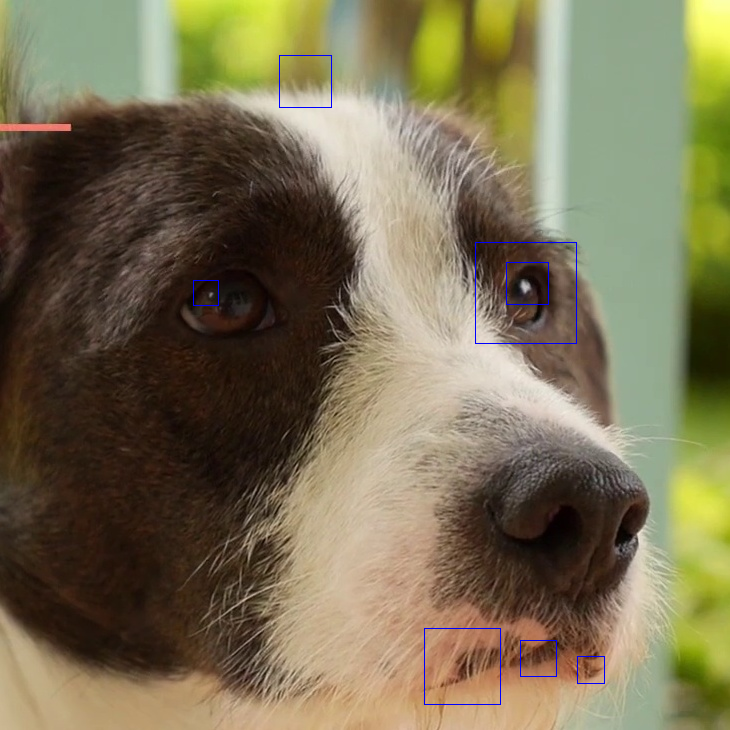

KeyboardInterrupt: ignored

In [5]:
def eyedetect(path):
  img = cv2.imread(path, cv2.IMREAD_COLOR)
  eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  eyes = eyes_cascade.detectMultiScale(img)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), 
                  (255, 0, 0), 1)
  cv2_imshow(img)

def eyesdetect(paths):
  for path in paths:
    eyedetect(path)
folder = '/content/drive/MyDrive/Dog anxiety Dataset /Data/face'
paths = getListOfFiles(folder)
eyesdetect(paths)

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img1 = img.copy()
faces_detected = face_cascade.detectMultiScale(img1, scaleFactor=1.1, minNeighbors=5)
print(len(faces_detected))
(x, y, w, h) = faces_detected[0]
cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 1);


eyes = eyes_cascade.detectMultiScale(img[y:y+h, x:x+w])
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), 
                  (255, 0, 0), 1)
cv2_imshow(img)

NameError: ignored